# PR 1: Introduction to Visual Analytics and Visualization libraries in Python

# Lab goals:
In this lab, we will deep dive into how Visual Analytics and some of the most relevant Python libraries: matplotlib and seaborn.
We will apply these two libraries to EDA: Exploratory Data Analysis, a key stage in a Machine Learning project.

Use as reference information for both libraries:
- seaborn-> https://seaborn.pydata.org/
- matplotlib-> https://matplotlib.org/

In data visualization there are some web references as:
- https://datavizproject.com/
- https://www.data-to-viz.com/


### Due date: during the lab session. It is not allowed to send it after the session
### Submission procedure: via Moodle.
### Complete with your Name: **Aniol Petit Cabarrocas**
### Complete with your NIA: **266255**

# 1 Environment setup and data gathering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
# Upload the dataset and store it in a tips variable.


In [3]:
tips = sns.load_dataset("tips")

**EX1** Print the top 5 and tail 5 of the dataset

In [4]:
# EX1 solution
print('Head:')
display(tips.head())
print('Tail:')
display(tips.tail())


Head:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Tail:


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


With .info() we can identify the structure of the dataframe: columns, types of variables and nulls.

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# 2 Exploratory Data Analysis (EDA)

## 2.1 Basics of EDA

**EX2** Is there any null in the dataframe?

In [6]:
# EX2 solution
print('Any nulls? ->', tips.isnull().values.any())

if tips.isnull().values.any():
    print('\nNulls per column:')
    print(tips.isnull().sum())


Any nulls? -> False


With .describe() we can obtain the main statistics of numerical variables

In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**EX3** Apply .unique() to identify unique values in categorical variables

In [8]:
# EX3 solution
categorical_cols = tips.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col} unique:", tips[col].unique())



sex unique: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker unique: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day unique: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time unique: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


**EX4** To complete the understanding of categorical variables, we need also to know how many samples by category in each variable. Use .value_count() to count the number of samples per *day*, *smoker* and *sex* categories

In [9]:
# EX4 solution
categorical_cols = tips.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Counts by {col}:", tips[col].value_counts(), "\n")



Counts by sex: sex
Male      157
Female     87
Name: count, dtype: int64 

Counts by smoker: smoker
No     151
Yes     93
Name: count, dtype: int64 

Counts by day: day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64 

Counts by time: time
Dinner    176
Lunch      68
Name: count, dtype: int64 



## 2.2 Applying visualization to improve the EDA

Let's create an auxiliar variable, *aux*, that is the value_counts() of tips.day

In [10]:
aux=tips.day.value_counts()

As a series, we can access the category name using **aux.index** and the category values by **aux.values**

In [11]:
aux.index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

In [12]:
# For reference in EX5 text
print('Most frequent day:', aux.idxmax())

Most frequent day: Sat


In [13]:
aux.values

array([87, 76, 62, 19])

**EX5** Let's create our first bar plot using the following code: i.e. plt.bar(x, height). Which is the day with more visits?

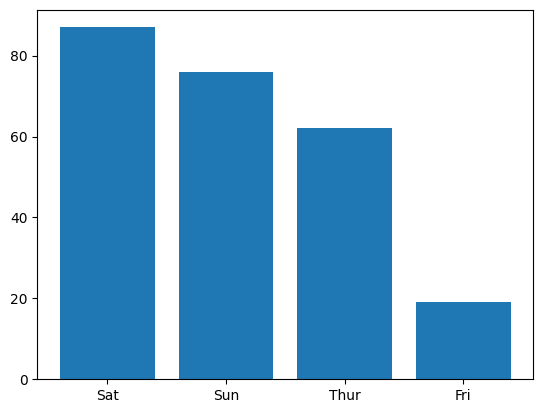

In [14]:
plt.figure()
plt.bar(x=aux.index,height=aux.values)
plt.show()

**EX5 solution**: From the plot we clearly see it's Saturday, which we could already see from using `aux.idxmax()`.


**EX6** Let's use several attributes of a bar plot. Create a new bar plot similar to the previous one with orange bars, no edgecolor, width of 0.4, align at the center the horizontal axis. Include also the legend.

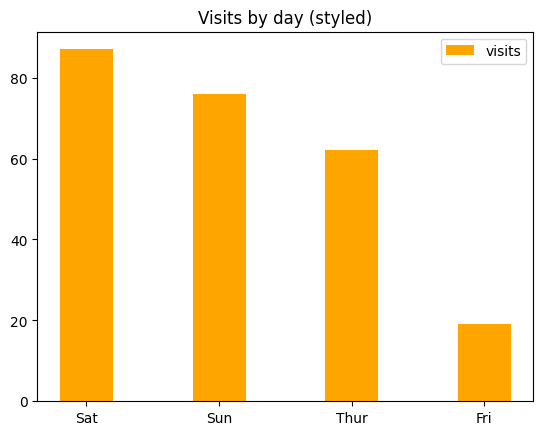

In [15]:
# EX6 solution
plt.figure()
plt.bar(x=aux.index, height=aux.values, color='orange', edgecolor=None, width=0.4, align='center', label='visits')
plt.legend()
plt.title('Visits by day (styled)')
plt.show()


**EX7** Repeat **EX6** but use color "grey" and rotation=90 in the x axis.

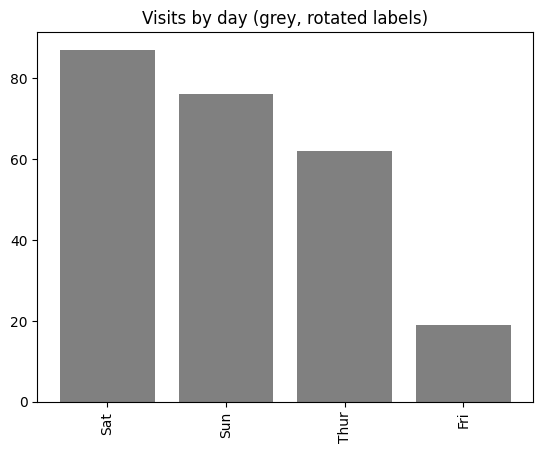

In [16]:
# EX7 solution
plt.figure()
plt.bar(x=aux.index, height=aux.values, color='grey')
plt.xticks(rotation=90)
plt.title('Visits by day (grey, rotated labels)')
plt.show()


**EX8** Repeat EX7 but with horizontal bars. Recall to use *plt.barh* instead of *plt.bar*. Use plt.yticks() to rotate the labels of y axis. Play with different rotation values.

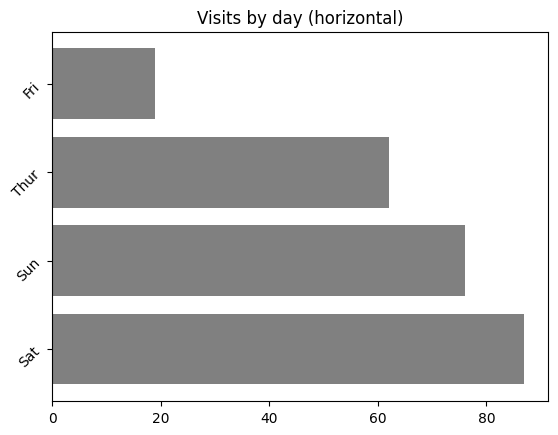

In [17]:
# EX8 solution
plt.figure()
plt.barh(y=aux.index, width=aux.values, color='grey')
plt.yticks(rotation=45)
plt.title('Visits by day (horizontal)')
plt.show()


**EX9** Repeat EX6 with seaborn. Use **sns.countplot()**. Which is the main difference with barplot?

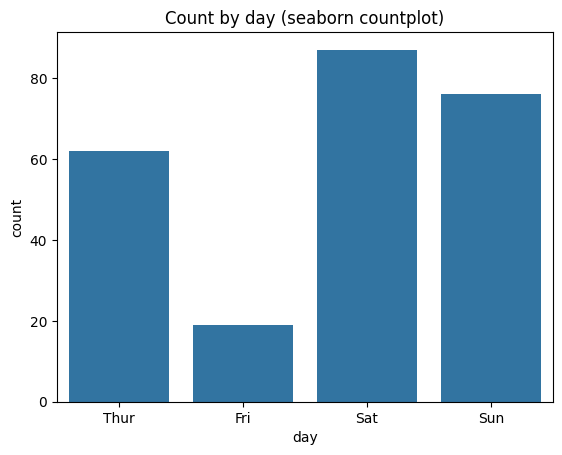

In [18]:
# EX9 solution
plt.figure()
sns.countplot(x='day', data=tips)
plt.title('Count by day (seaborn countplot)')
plt.show()
# The main difference between countplot and plt.bar with value_counts is that countplot computes counts from the raw data directly.


**EX10** Let's apply sns.barplot(data=tips, x="day", y="total_bill"). Which is this code line returning? Tip: Compare the plot with the main statistics of "total_bill" for each of these days using *.describe()*.

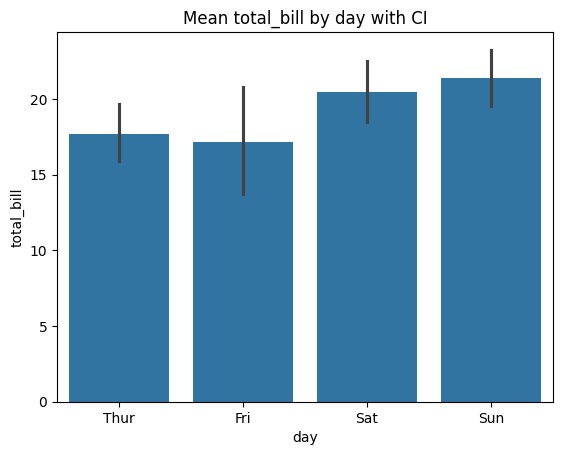

Per-day total_bill statistics:


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5464\2793320375.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(tips.groupby('day')['total_bill'].describe().round(2))


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.68,7.89,7.51,12.44,16.20,20.16,43.11
Fri,19.0,17.15,8.30,5.75,12.10,15.38,21.75,40.17
Sat,87.0,20.44,9.48,3.07,13.90,18.24,24.74,50.81
Sun,76.0,21.41,8.83,7.25,14.99,19.63,25.60,48.17


In [19]:
# EX10 solution (exact code and comparison)
plt.figure()
sns.barplot(data=tips, x="day", y="total_bill")
plt.title('Mean total_bill by day with CI')
plt.show()

print('Per-day total_bill statistics:')
display(tips.groupby('day')['total_bill'].describe().round(2))


# The barplot shows the mean `total_bill` per `day` with confidence intervals. Comparing to `.describe()` per day, we can see the bar heights match the group means.


**EX11** Create a pie plot to represent the % of days with tips per each day. Use plt.pie() from matplotlib (Recall: aux.index represents the days and aux.values stores the number of days per day). Tip: Use autopct='%1.2f' as an attribute to show the ratio value in terms of '%'

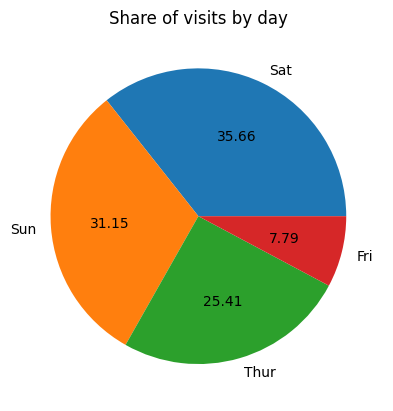

In [20]:
# EX11 solution
plt.figure()
plt.pie(aux.values, labels=aux.index, autopct='%1.2f')
plt.title('Share of visits by day')
plt.show()


If we want to control the color attribute of each piece of the pie, we can create a variable colors as follows:

In [21]:
color = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(aux.index)))

**EX12** Now repeat the previous plot that includes the `colors`=color attribute and also the following ones: explode=[0.2,0,0,0] and radius=3. Which are the effects of these parameters into the plot?

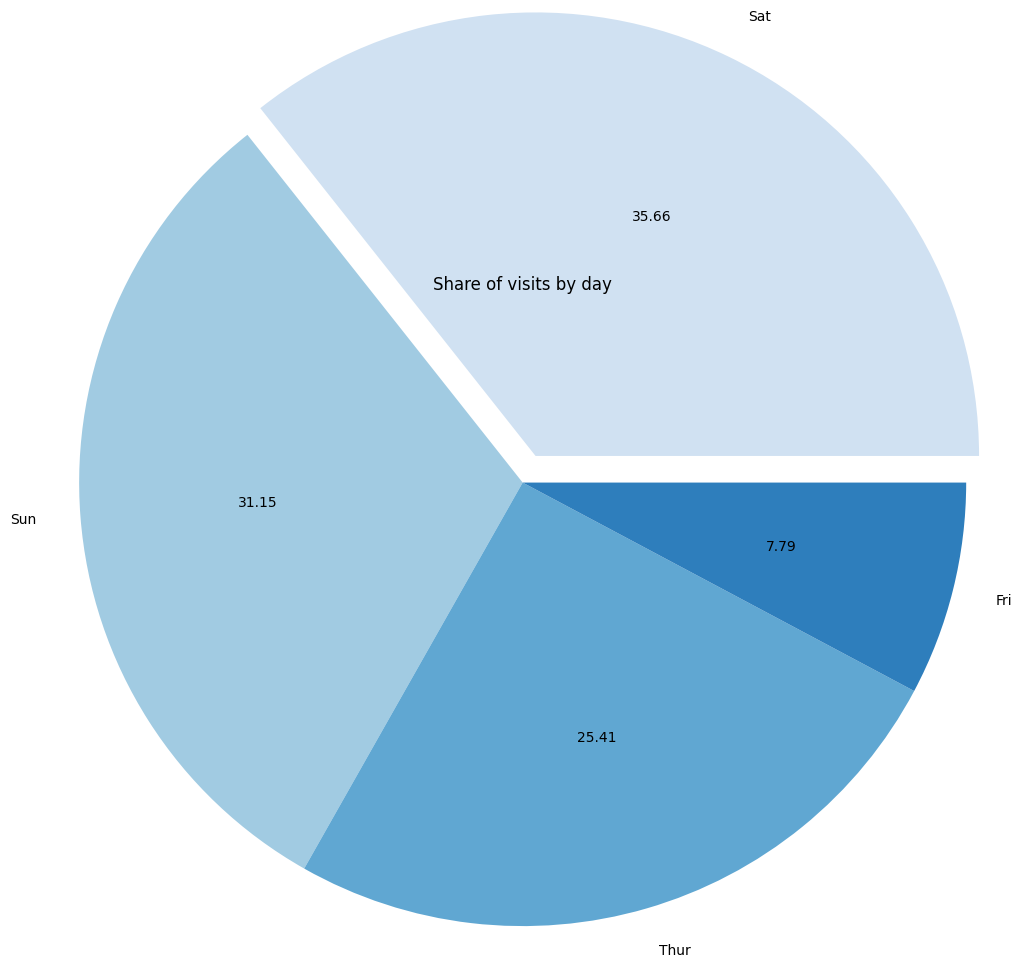

In [22]:
# EX12 solution
plt.figure()
plt.pie(aux.values, labels=aux.index, autopct='%1.2f', colors=color, explode=[0.2,0,0,0], radius=3)
plt.title('Share of visits by day')
plt.show()
# explode emphasizes the first slice; radius increases the size; colors applies a gradient palette.


##**Distributions plots:**##

**Histograms**:

*matplotlib function*: hist(x)
*parameters*:

- color: Set the color of the bars in the histogram.
- bins: Set the number of bins to display in the histogram, or specify speciic bins.



*seaborn function*: sns.displot(x)
*parameters*:

- color: Set the color of the bars in the histogram.
- kind: Approach for visualizing the data. Selects the underlying plotting function and determines the additional set of valid parameters.


**Boxplots**:

*matplotlib function*: violinplot(x)

*seaborn function*: sns.boxplot(x)

**Violin**: A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

*matplotlib function*: violinplot(x)
*parameters*:
- showmeans: If True, will toggle rendering of the means.
- showextrema: If True, will toggle rendering of the extrema.
- showmedians: If True, will toggle rendering of the medians.

*seaborn function*: sns.violinplot(x)

**EX13** Execute this histogram plot and examine the results. What type of distribution this variable presents?

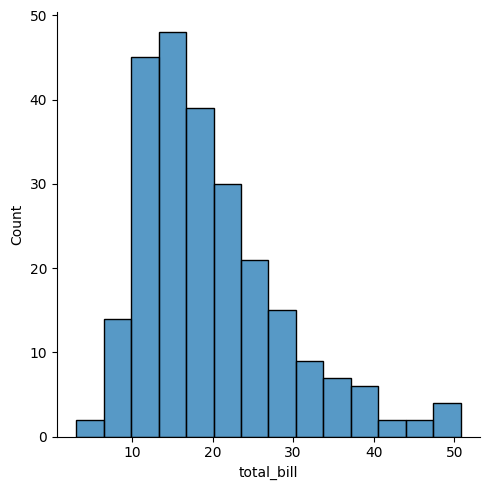

In [23]:
sns.displot(tips['total_bill'], kind="hist")

**EX13 solution**: `total_bill` shows a right-skewed distribution with many small and moderate bills and fewer large bills, which is tyipical of a Poisson distribution.


**EX14** Repeat the previous exercise with matplotlib (i.e. plt.hist()). Enrich the visualization with orange colour and 150 bins. Add a title, X and Y axis names. Any issue in the visualization? How could you improve the distribution visualization?

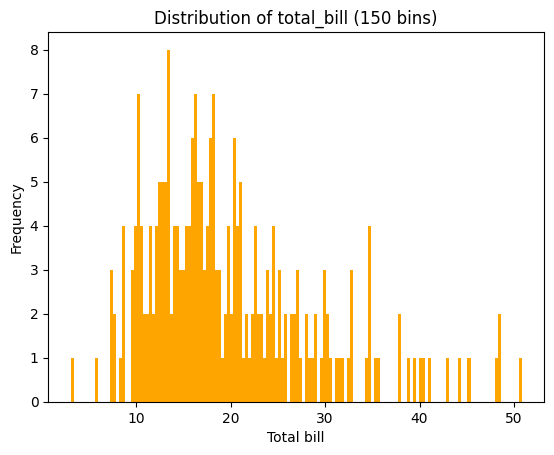

In [24]:
# EX14 solution
plt.figure()
plt.hist(tips['total_bill'], bins=150, color='orange')
plt.title('Distribution of total_bill (150 bins)')
plt.xlabel('Total bill')
plt.ylabel('Frequency')
plt.show()
# With too many bins, the plot can look noisy or sparse, which is not great in terms of readibility and interpretability. Fewer bins or KDE can improve this.


**EX15** Fix the identified issue and repeat the previous exercise.

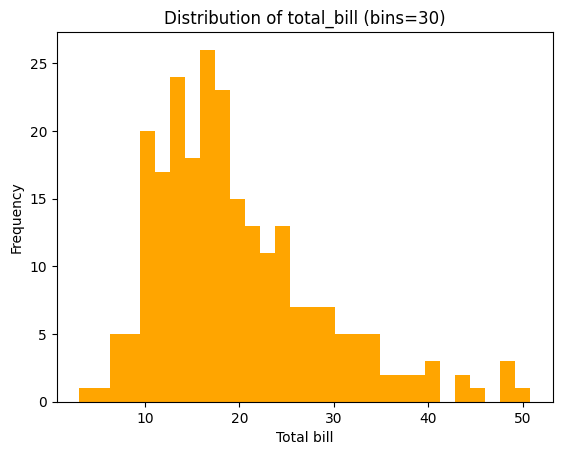

In [25]:
# EX15 solution
plt.figure()
plt.hist(tips['total_bill'], bins=30, color='orange')
plt.title('Distribution of total_bill (bins=30)')
plt.xlabel('Total bill')
plt.ylabel('Frequency')
plt.show()

# With a more reasonable number of bins, we can see a much better plot, not so sparse and much more pleasant and easier to read and interpret

**EX16** Execute the following code and describe what it is representing.

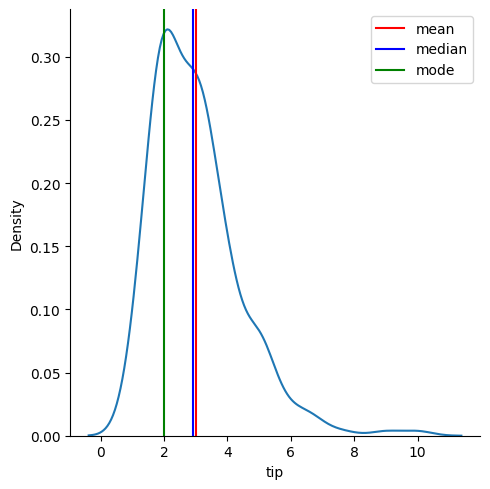

In [26]:
from statistics import mode
mean=tips["tip"].mean()
median=tips["tip"].median()
mode=mode(tips["tip"])
sns.displot(tips["tip"],kind="kde")
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode,color='g',label='mode')
plt.legend()
plt.show()

**EX16 solution**: The light-blue smooth curve is the KDE (kernel density estimate) of `tip`, showing the estimated probability density across values, and then we can interpret other things about the distribution thanks to the lines marking the mean, median and mode, as indicated in the legend


**EX17** Execute the following code and describe what it is representing.

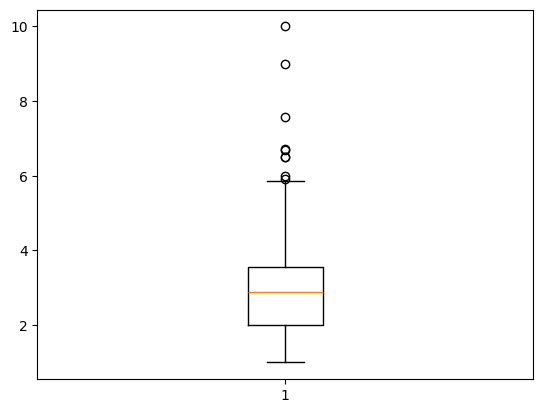

In [27]:
plt.boxplot(tips["tip"])
plt.show()

**EX17 solution**: The boxplot of `tip` shows the median (line), interquartile range (box), horizontal lines extending to non-outlier ranges, and individual outliers beyond these lines marked with circles. It summarizes central tendency, spread, and outliers.


**EX18** Build a boxplot of `tip` variable per day using sns.boxplot()

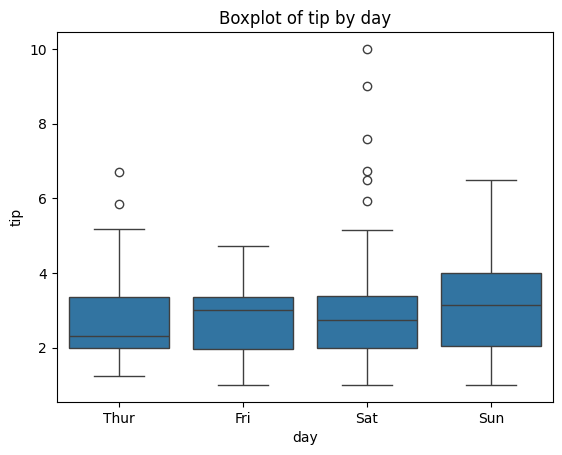

In [28]:
# EX18 solution
sns.boxplot(data=tips, x='day', y='tip')
plt.title('Boxplot of tip by day')
plt.show()

**EX19** Execute the following code and describe the visualization

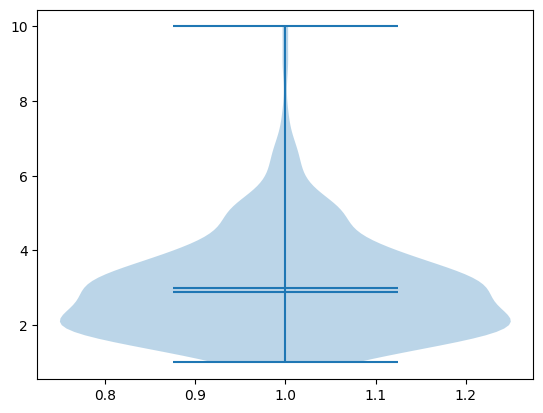

In [29]:
plt.violinplot(tips["tip"], showmeans=True, showmedians=True, showextrema=True)
plt.show()

**EX19 solution**: The violin plot shows the full distribution of `tip`, with width indicating density. The lines mark mean, median, and extrema.


**EX20** Build a violin plot of the `tip` variable per day and differentiating the `sex`variable using sns.violinplot(x,y, hue="sex")

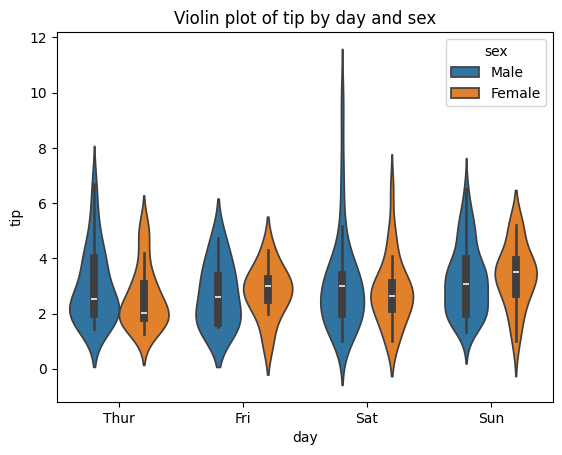

In [30]:
# EX20 solution
sns.violinplot(data=tips, x='day', y='tip', hue='sex', split=False)
plt.title('Violin plot of tip by day and sex')
plt.show()


**EX21** Do females use to give more tips on Sundays? and on Saturdays? Justify your answer.

In [31]:
# EX21 solution
by = tips[tips['day'].isin(['Sun','Sat'])].groupby(['day','sex'])['tip'].agg(['mean','median','count']).round(2)
print(by)
print()
for d in ['Sun','Sat']:
    female = by.loc[(d,'Female'),'median']
    male = by.loc[(d,'Male'),'median']
    print(f"{d}: median tip — Female {female} vs Male {male}")

# According to the data we would say that women tip more on sundays while male tip more on saturdays, but this seems just like a coincidence and I wouldn't personally extract much conclusions on this yet.

             mean  median  count
day  sex                        
Thur Male     NaN     NaN      0
     Female   NaN     NaN      0
Fri  Male     NaN     NaN      0
     Female   NaN     NaN      0
Sat  Male    3.08    3.00     59
     Female  2.80    2.62     28
Sun  Male    3.22    3.08     58
     Female  3.37    3.50     18

Sun: median tip — Female 3.5 vs Male 3.08
Sat: median tip — Female 2.62 vs Male 3.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5464\2417677733.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by = tips[tips['day'].isin(['Sun','Sat'])].groupby(['day','sex'])['tip'].agg(['mean','median','count']).round(2)


##**Plots to represent relationships between variables:**##

**Scatterplot**:

Scatter plots are used to observe relationships between variables and uses dots to represent the relationship between them.

*matplotlib function*: scatter(x, y)
*parameters*:

- c: Set the color of the markers.
- s: Set the size of the markers.
- marker: Set the marker style, e.g., circles, triangles, or squares.
- edgecolor: Set the color of the lines on the edges of the markers.


**Jointplot**:

Draw a plot of two variables with bivariate and univariate graphs.

*seaborn*: sns.jointplot (x, y, data).


**Correlation matrix**:
To represent the correlation matrix, we will create a heatmap in matplotlib and seaborn.

*matplotlib function*: plt.imshow(`correlation matrix`)

*seaborn*: sns.heatmap(`correlation matrix`)

**Pairplot**:

This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

*seaborn*: seaborn.pairplot()
*parameters*:

- kind: Kind of plot to make
- markerssingle:  matplotlib marker code or list
- huename of variable in data




**EX22** Execute this scatter plot and examine the results. Which insight do you get from it?

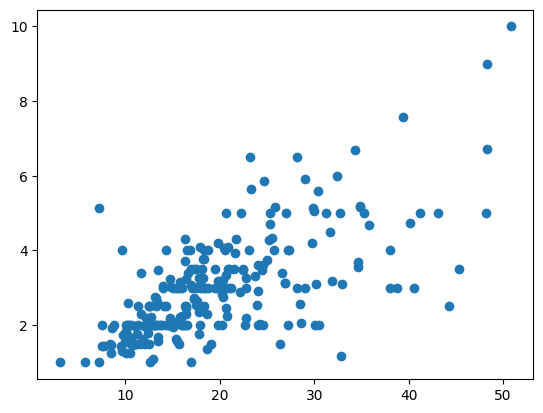

In [32]:
plt.scatter(tips["total_bill"], tips['tip'])
plt.show()

**EX22 solution**: The scatter shows a positive relationship: larger `total_bill` generally leads to higher `tip`, though with increasing spread.


**EX23** Repeat the previous exercise but adding the `s`=10, `marker`="o" and colour depending on the value of tips.total_bill. Add a title and X and Y labels.

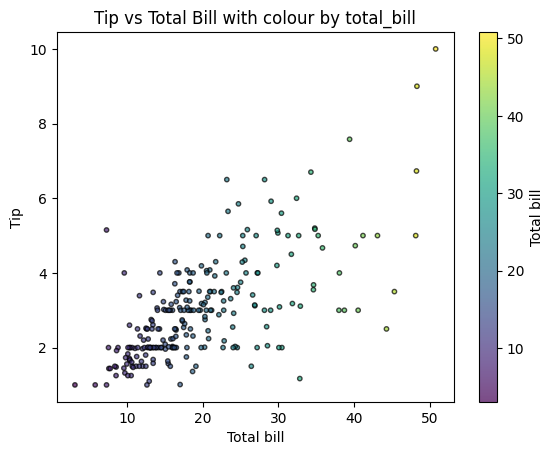

In [33]:
# EX23 (styled scatter) solution
plt.scatter(
    tips["total_bill"], tips['tip'],
    s=10, marker='o', c=tips['total_bill'], cmap='viridis', edgecolor='k', alpha=0.7
)
plt.title('Tip vs Total Bill with colour by total_bill')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.colorbar(label='Total bill')
plt.show()


**EX23** Repeat the previous exercise where the size of each sample depends on the value of the tip multiplied by a factor x10.

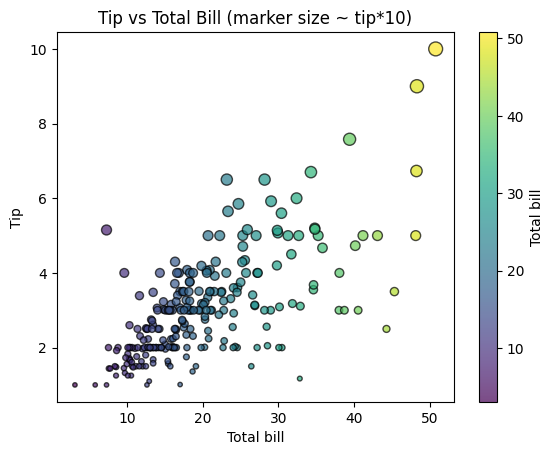

In [34]:
# EX23 (size ~ tip*10) solution
sizes = tips['tip'] * 10
plt.scatter(tips["total_bill"], tips['tip'], s=sizes, c=tips['total_bill'], cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title('Tip vs Total Bill (marker size ~ tip*10)')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.colorbar(label='Total bill')
plt.show()


**EX24**: Execute the following jointplot.

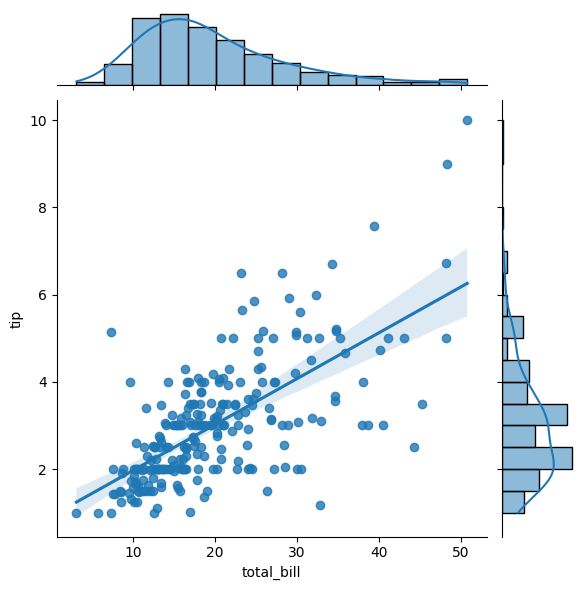

In [35]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

**EX25**: Is the correlation between `total_bill`and `tip`similar between males and females? To answer this question build a sns.jointplot with hue="sex".

Text(0.5, 1.0, 'Tip vs Total Bill with regression lines by sex')

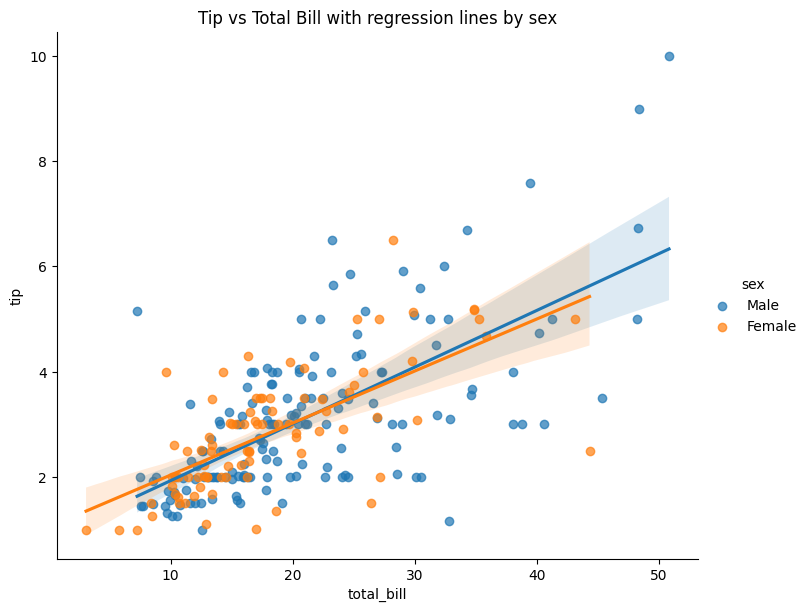

In [36]:
# EX25 solution
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", height=6, aspect=1.2, scatter_kws={"alpha":0.7})
plt.title('Tip vs Total Bill with regression lines by sex')

# The overall correlation seems quite similar, but we can observe that the greater outliers correspond all to men, which is at least curious and interesting

**EX26** Execute the following and code. Which are the variable with more correlation? And with lower correlation?

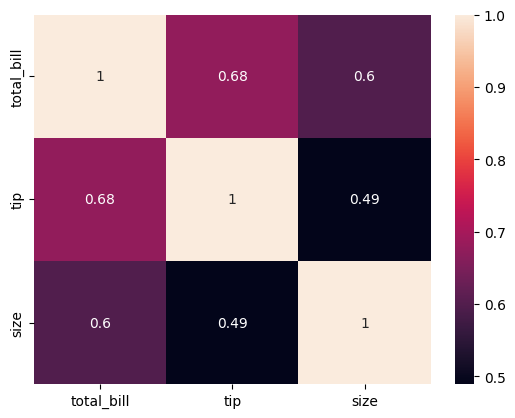

<Figure size 500x500 with 0 Axes>

In [37]:
# modified to avoid getting an error
corr_numeric = tips.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_numeric, annot=True)
plt.figure(figsize=(5,5))
plt.show()

**EX26 solution**: The two variables with more correlation are `total_bill` and `tip`, and the ones with the less correlation are `size`and `tip`

**EX27** Execute the following visualization code. Are `total_bill`, `tip`and `size`variables with the same distribution between male and female?

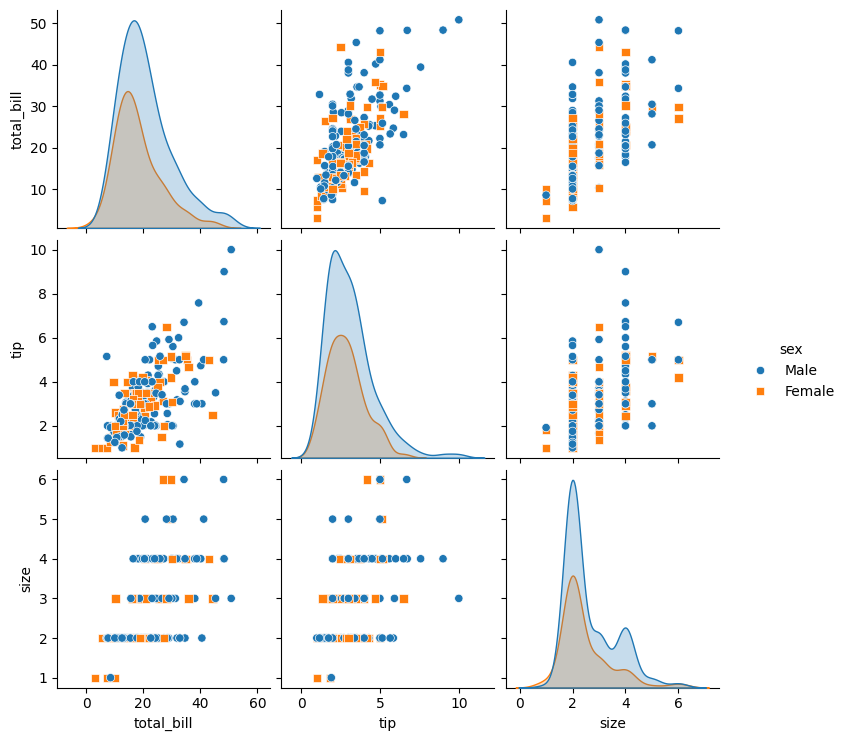

In [38]:
sns.pairplot(data=tips,hue='sex', markers=["o", "s"])
plt.show()

**EX27 solution**: The distributions of `total_bill`, `tip`, and `size` are quite similar between males and females, with small differences in central tendency and spread but there is no heavy shift suggesting a different distribution.


##**Multi-plots and subplots:**##

**Subplots**:

Build multiple charts in a figure.

*matplotlib* subplot(nrows, ncols, plot_number)
• nrows: The number of rows in the igure.
• ncols: The number of columns in the igure.
• plot_number: The placement of the chart (starts at 1).


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lr=LabelEncoder()

In [41]:
tips['LE Day']=lr.fit_transform(tips['day'])

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,LE Day
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,2


**EX28**: Execute the following code. What are they representing?


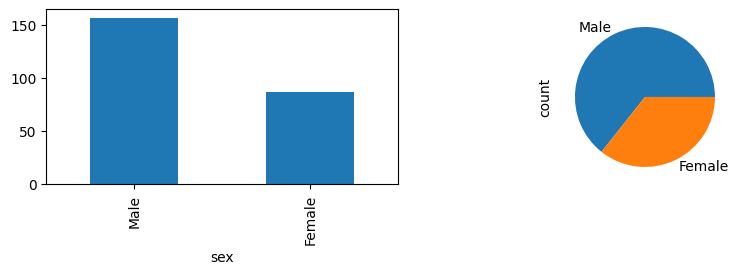

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
tips['sex'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
tips['sex'].value_counts().plot(kind='pie')
plt.show()

**EX28 answer**: The first subplot (bar chart) shows the absolute counts of records by `sex` (how many males vs females). The second subplot (pie chart) shows the relative proportions of those same categories (each category’s share of the whole in %). 

**EX29**: Look at the following code. Its output is similar to the previous exercise but the subplots are swaped. Modify the code to have the same order: i.e. first subplot should be barplot and the second one, the pie chart.

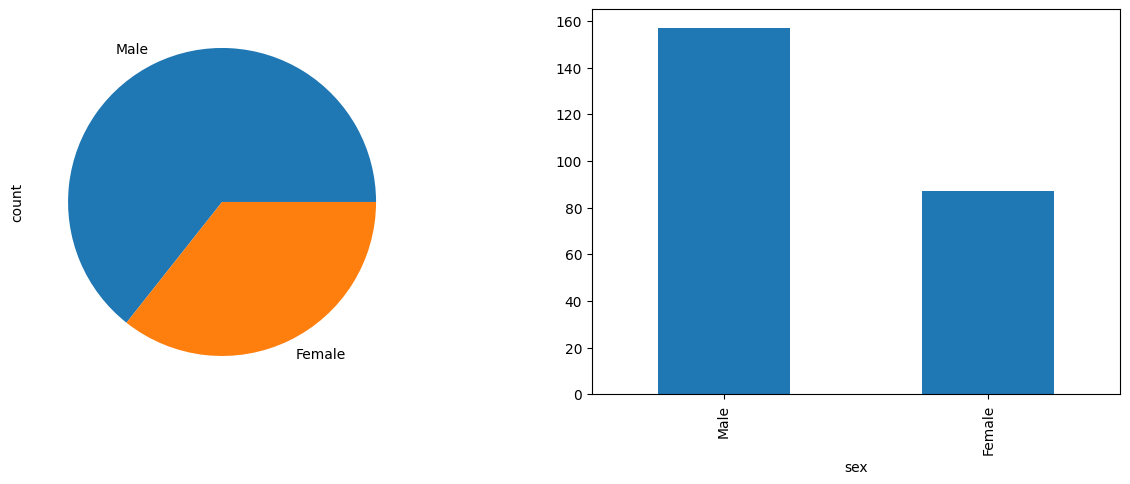

In [44]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
tips['sex'].value_counts().plot(kind='bar',ax=axes[1])
tips['sex'].value_counts().plot(kind='pie',ax=axes[0])
plt.show()

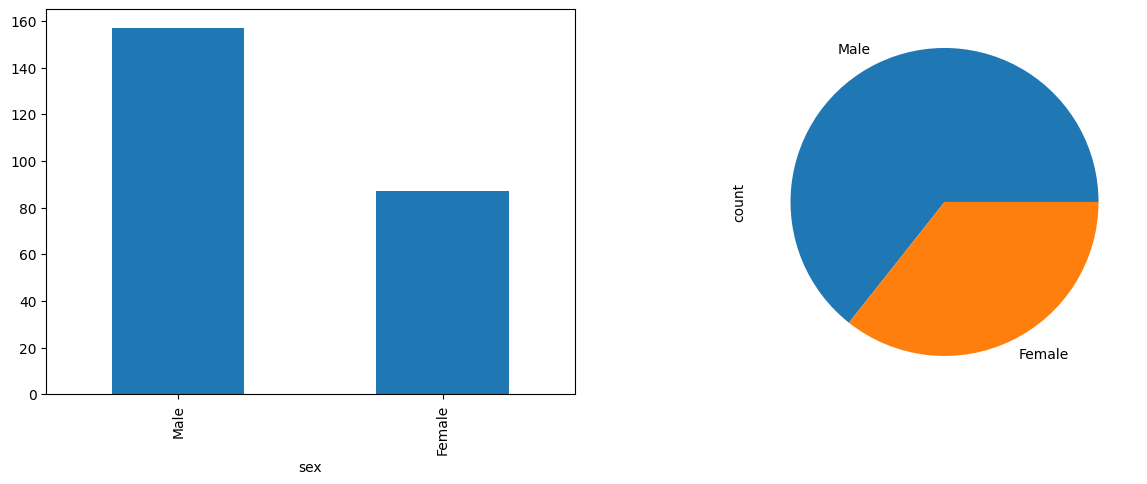

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# EX29 solution: first bar, then pie
tips['sex'].value_counts().plot(kind='bar', ax=axes[0])
tips['sex'].value_counts().plot(kind='pie', ax=axes[1])
plt.show()
